In [1]:
#This is a kaggle notebook.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/market-basket-analysis/Assignment-1_Data.xlsx
/kaggle/input/market-basket-analysis/Assignment-1_Data.csv


# Market Basket Analysis Project

## Project Introduction
This project aims to analyze market basket data. In this notebook, we will load and preprocess the dataset.

## Dataset :
The dataset is stored in the file named "Assignment-1_Data.xlsx" located at "/kaggle/input/market-basket-analysis/". It contains information on market transactions.

## Loading the Dataset
Let's start by loading the dataset into a DataFrame using the pandas library.


In [2]:
import pandas as pd

dataset_path = '/kaggle/input/market-basket-analysis/Assignment-1_Data.xlsx'
df = pd.read_excel(dataset_path)

# **Initial Exploration**

To gain a better understanding of the dataset's structure and characteristics, we will conduct an initial exploration.

In [3]:
print("Number of rows and columns:", df.shape)
print("\nData Types and Missing Values:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

Number of rows and columns: (522064, 7)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB
None

First few rows of the dataset:
   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CR

# Preprocessing

Now to prepare the data for analysis, we will perform preprocessing steps. This will ensure that the data is ready for further analysis.

**DROP ROWS WITH MISSING VALUES**

In [4]:
print("Missing Values:")
print(df.isnull().sum())
df.dropna(inplace=True)


Missing Values:
BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64


**CONVERT DATAFRAME INTO TRANSACTION DATA**

In [5]:
transaction_data = df.groupby(['BillNo', 'Date'])['Itemname'].apply(lambda x: ', '.join(x)).reset_index()

**DROP UNNECESSARY COLUMNS**

In [6]:
columns_to_drop = ['BillNo', 'Date']
transaction_data.drop(columns=columns_to_drop, inplace=True)

**SAVING THE TRANSACTION DATA TO A CSV FILE**

In [7]:
transaction_data_path = '/kaggle/working/transaction_data.csv'
transaction_data.to_csv(transaction_data_path, index=False)

**DISPLAYING THE TRANSACTION DATA**

In [8]:
print("\nTransaction Data for Association Rule Mining:")
print(transaction_data.head())
transaction_data.shape


Transaction Data for Association Rule Mining:
                                            Itemname
0  WHITE HANGING HEART T-LIGHT HOLDER, WHITE META...
1  HAND WARMER UNION JACK, HAND WARMER RED POLKA DOT
2  ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHOU...
3  JAM MAKING SET WITH JARS, RED COAT RACK PARIS ...
4                           BATH BUILDING BLOCK WORD


(18192, 1)

# Phase 4 starts from here

## Formatting the transaction data in a suitable format for analysis

To format the transaction data for analysis, we can split the ‘Itemname’ column in transaction_data into individual items using str.split(', ', expand=True). Then, we can concatenate the original DataFrame (transaction_data) with the items DataFrame (items_df) using pd.concat. Finally, we can drop the original ‘Itemname’ column since individual items are now in separate columns. Atlast Display the resulting DataFrame.

In [9]:
# Split the 'Itemname' column into individual items
items_df = transaction_data['Itemname'].str.split(', ', expand=True)

# Concatenate the original DataFrame with the new items DataFrame
transaction_data = pd.concat([transaction_data, items_df], axis=1)

# Drop the original 'Itemname' column
transaction_data = transaction_data.drop('Itemname', axis=1)

# Display the resulting DataFrame
print(transaction_data.head())

                                  0                            1    \
0  WHITE HANGING HEART T-LIGHT HOLDER          WHITE METAL LANTERN   
1              HAND WARMER UNION JACK    HAND WARMER RED POLKA DOT   
2       ASSORTED COLOUR BIRD ORNAMENT    POPPY'S PLAYHOUSE BEDROOM   
3            JAM MAKING SET WITH JARS  RED COAT RACK PARIS FASHION   
4            BATH BUILDING BLOCK WORD                         None   

                              2                                    3    \
0  CREAM CUPID HEARTS COAT HANGER  KNITTED UNION FLAG HOT WATER BOTTLE   
1                            None                                 None   
2       POPPY'S PLAYHOUSE KITCHEN    FELTCRAFT PRINCESS CHARLOTTE DOLL   
3  YELLOW COAT RACK PARIS FASHION         BLUE COAT RACK PARIS FASHION   
4                            None                                 None   

                              4                                   5    \
0  RED WOOLLY HOTTIE WHITE HEART.        SET 7 BABUSHKA NESTI

# Association Rules - Data Mining
## Converting Items to Boolean Columns

To apply association rule mining on the **transaction_data** DataFrame, we need to transform the items into boolean columns. We use one-hot encoding to do this, which creates a new DataFrame (**df_encoded**) with boolean columns for each item. The **pd.get_dummies** function performs this transformation.

In [10]:
# Convert items to boolean columns
df_encoded = pd.get_dummies(transaction_data, prefix='', prefix_sep='').groupby(level=0, axis=1).max()

# Save the transaction data to a CSV file
df_encoded.to_csv('transaction_data_encoded.csv', index=False)


## Association Rule Mining
We will use the Apriori algorithm to mine association rules from the encoded transaction data. We set the **min_support** parameter to 0.007 to filter out rare itemsets. We will then use the frequent itemsets to generate association rules based on a minimum confidence threshold of 0.5 then print the generated association rules.

In [11]:
# Load transaction data into a DataFrame
df_encoded = pd.read_csv('transaction_data_encoded.csv')

from mlxtend.frequent_patterns import apriori, association_rules

# Association Rule Mining
frequent_itemsets = apriori(df_encoded, min_support=0.007, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display information of the rules
print("Association Rules:")
print(rules.head())

Association Rules:
                         antecedents                        consequents  \
0            (CHOCOLATE BOX RIBBONS)           (6 RIBBONS RUSTIC CHARM)   
1  (60 CAKE CASES DOLLY GIRL DESIGN)  (PACK OF 72 RETROSPOT CAKE CASES)   
2      (60 TEATIME FAIRY CAKE CASES)  (PACK OF 72 RETROSPOT CAKE CASES)   
3   (ALARM CLOCK BAKELIKE CHOCOLATE)       (ALARM CLOCK BAKELIKE GREEN)   
4   (ALARM CLOCK BAKELIKE CHOCOLATE)        (ALARM CLOCK BAKELIKE PINK)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.012368            0.039193  0.007036    0.568889  14.515044   
1            0.018525            0.054529  0.010059    0.543027   9.958409   
2            0.034631            0.054529  0.017315    0.500000   9.169355   
3            0.017150            0.042931  0.011379    0.663462  15.454151   
4            0.017150            0.032652  0.009125    0.532051  16.294742   

   leverage  conviction  zhangs_metric  
0  0.006551    2.228

# Visualization 

## Visual Representations of Market Basket Analysis Results
To visualize the outcomes of our market basket analysis, we employ the Matplotlib and Seaborn libraries. Through a scatterplot, we aim to illustrate the connections between support, confidence, and lift within the association rules that we've generated.


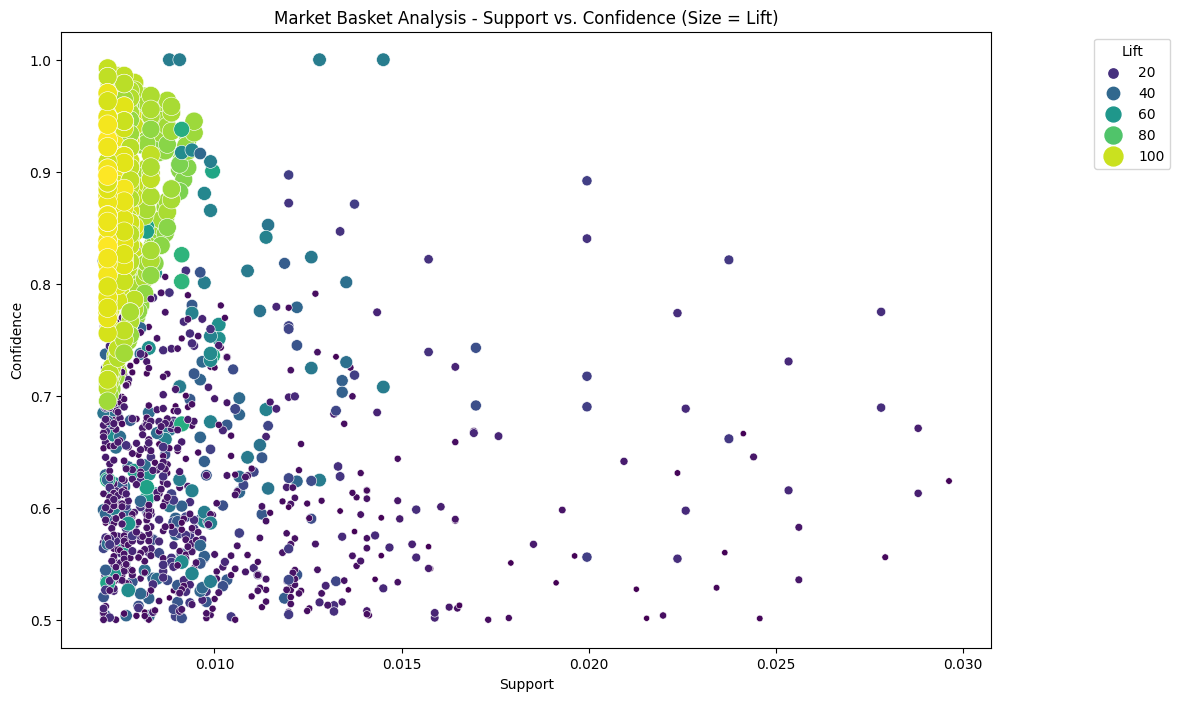

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatterplot for Support vs. Confidence
plt.figure(figsize=(12, 8))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, hue="lift", palette="viridis", sizes=(20, 200))
plt.title('Market Basket Analysis - Support vs. Confidence (Size = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


## Developing an Interactive Visualization for Market Basket Analysis:

In this context, we harness the capabilities of the Plotly Express library to craft an interactive scatter plot that vividly represents the results of our market basket analysis. This interactive plot empowers users to explore the intricate connections between support, confidence, and lift within the association rules we've generated.


In [13]:
import plotly.express as px

# Convert frozensets to lists for serialization
rules['antecedents'] = rules['antecedents'].apply(list)
rules['consequents'] = rules['consequents'].apply(list)

# Create an interactive scatter plot using plotly express
fig = px.scatter(rules, x="support", y="confidence", size="lift",
                 color="lift", hover_name="consequents",
                 title='Market Basket Analysis - Support vs. Confidence',
                 labels={'support': 'Support', 'confidence': 'Confidence'})

# Customize the layout
fig.update_layout(
    xaxis_title='Support',
    yaxis_title='Confidence',
    coloraxis_colorbar_title='Lift',
    showlegend=True
)

# Show the interactive plot
fig.show()


## Interactive Network Visualization for Association Rules

For our association rules, we employ the NetworkX and Plotly libraries to create an interactive network graph. This graph visually represents the relationships between antecedent and consequent items, with support values as edge weights.

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from association rules
for idx, row in rules.iterrows():
    G.add_node(tuple(row['antecedents']), color='skyblue')
    G.add_node(tuple(row['consequents']), color='orange')
    G.add_edge(tuple(row['antecedents']), tuple(row['consequents']), weight=row['support'])

# Set node positions using a spring layout
pos = nx.spring_layout(G)

# Create an interactive plot using plotly
edge_x = []
edge_y = []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        )
    )
)

# Customize the layout
layout = go.Layout(
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=0),
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

# Show the interactive graph
fig.show()


## Interactive Sunburst Chart for Association Rules

We utilize Plotly Express to design an interactive sunburst chart for our association rules. This chart visually showcases the relationships between antecedent and consequent items, with color intensity representing both lift and support.


In [15]:
import plotly.express as px

# Combine antecedents and consequents into a single column for each rule
rules['rule'] = rules['antecedents'].astype(str) + ' -> ' + rules['consequents'].astype(str)

# Create a sunburst chart
fig = px.sunburst(rules, path=['rule'], values='lift', 
                  title='Market Basket Analysis - Sunburst Chart',
                  color='support', color_continuous_scale='YlGnBu')

# Customize the layout
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show the interactive plot
fig.show()
